In [1]:
import numpy
from scipy import stats

# Критерий согласия (goodness of fit)
= критерий для проверки гипотезы "выборка $x^n$ семплирована из распределения $\mathcal{P}$"

<br>
Во многих статистических задачах мы предполагаем, что некоторые
случайные величины имеют заданное распределение (нормальное, экспоненциальное и т.д.).  Если  параметры этого распределения  предполагаются известными, то это простая гипотеза, в противном случае - сложная. 
Однако возникает вопрос: насколько наши предположения о распределении случайных величин соответствуют
экспериментальным данным? Можно поставить этот вопрос
иначе: не вступает ли принятая статистическая модель в противоречие
с имеющимися данными?
Для решения этого вопроса придуманы различные статистические критерии. Чтобы выделить такие
критерии из остальных, их часто называют критериями согласия. Одним из таких критериев является критерий Колмогорова.

Критерий Колмогорова используется для проверки гипотезы: подчиняется ли случайная величина некоторому теоретическому закону распределения $\mathcal{P}$. Проверку можно проводить для любого вида распределения. Критерий основан на определении максимального отклонения от предполагаемой теоретической функции распределения.

Гипотеза **простая**, если $\mathcal{P}$ определено с точностью до всех параметров

- $H_0: x^n$ семплирована из $\text{Norm}(\mu=0, \sigma=1)$

<br>

Гипотеза **сложная**, если в $\mathcal{P}$ часть параметров неизвестна

- $H_0: x^n$ семплирована из $\text{Norm}$ с какими-то $\mu, \sigma$.

<br>

> 📈 **Пример**
 >  + Предположим, у нас есть некое распределение из 1000 элементов, полученных в результате каких-либо испытаний. Нужно проверить, соответствует ли это распределение нормальному.
 >  + Вопрос: это простая или сложная гипотеза? Почему?
 >  + Ответ: это гипотеза сложная - нам неизвестны параметры распределения, мы проверяем наше распределение на принадлежность целому классу нормальных распределений.


#### Критерий Колмогорова для простой гипотезы
 
 Пусть у нас есть некоторая выборка $x_1, x_2 \dots x_n, n=20$, и согласно нашей гипотезе $H_0$, эта выборка была получена из конкретного нормального распределения с параметрами ($\mu=0.10, \sigma=0.04$). Заметим, что эта задача на проверку простой гипотезы, так как мы проверяем на принадлежность распределению с определенными параметрами. 



Отметим, что каждый раз выбор статистики ложится на плечи аналитика. В данном случае мы предлагаем рассмотреть статистику,
основанную на эмпирической функции распределения. Напомним, как она выглядит:

$$F_n(x) = \frac{1}{n}\sum_i[X_i \leqslant x]$$
Функция распределения случайной велечины, построенной на выборке $x_1, x_2 \dots x_n$ показывает долю таких значений $x_i$,  что $x_i \leqslant x, i=1,...,n $

 Пусть у нас есть выборка $x_1, x_2 \dots x_n, n=20$, полученная из некоторого распределения. Мы хотим найти ее кумулятивную функцию распределения по имеющейся выборке. Найти точную функцию мы не сможем из-за ограниченности наших данных, но мы можем постараться найти ее приближенную функцию распределения.
 

In [2]:
# это наша выборка
sample = [0.11, 0.07, 0.1, 0.09, 0.17, 0.14, 0.05, 0.05, 0.17, 0.07, 0.06, 0.06, 0.12, 0.12, 0.08, 0.15, 0.07, 0.06, 0.13, 0.17]

Пусть $x=0.1$, проверим, чему равна вероятность получить из нашей выборки что-то $\leqslant 0.1$. Самый простой способ - это посмотреть, какой процент нашей выборки не превосходит 0.1. Этот процент и будет нашей эмпирической вероятностью. 

In [3]:
x = 0.1
sum([s <= 0.1 for s in sample]) / len(sample)
# посчитаем, сколько у нас таких чисел, и поделим на длину выборки. 


0.55

Основываясь на полученных данных, мы можем говорить, что получить что-то, не превышающее 0.1 из данной случайной величины составляет 55%. Построим график нашей эмпирической функции распределения и сравним его с нашей начальной гипотезой.

In [4]:
x_axis = numpy.arange(start=0.01, stop=0.20, step=0.001)

# аппроксимируем CDF распределения, из которого семплирована наша выборка
# эмпирическая функция распределения:
emp_cdf_y = []
for x in x_axis:
    cdf_for_x = sum([int(b <= x) for b in sample]) / len(sample)
    emp_cdf_y.append(cdf_for_x)

In [5]:
from scipy.stats import norm

# рассмотрим CDF нормального распределения
# возьмем loc и scale из условия задачи ¯\_(ツ)_/¯
norm_cdf_y = norm.cdf(x=x_axis, loc=0.10, scale=0.04)

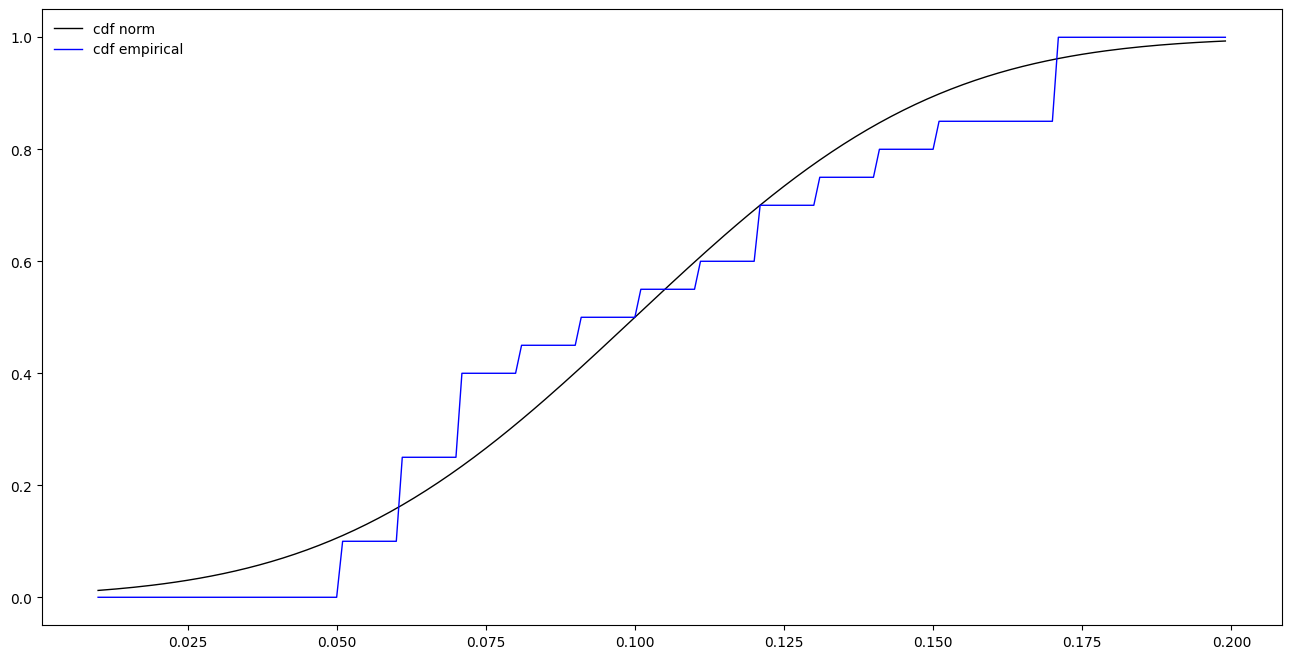

In [6]:

import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(16, 8))


pyplot.plot(x_axis, norm_cdf_y, 'k-', linewidth=1.0, label='cdf norm')
pyplot.plot(x_axis, emp_cdf_y, 'b-', linewidth=1.0, label='cdf empirical')

pyplot.legend(loc='best', frameon=False)
pyplot.show()

Сравним нашу эмпирическую функцию распределения (синий график) с теоретической функцией распределения (серый график). Напомним, что наша теоретическая функция распределения - это нормальное распределение с параметрами $\mu=0.10, \sigma=0.04$.   
Теперь нужно выбрать некую статистику, которая характерезует отличие этих двух функций. Замерив критические области (например, методом Монте-Карло) и  опираясь на эту статистику, можно будет сделать вывод: отвергать нашу гипотезу или нет. Воспользуемся статистикой Колмогорова.

#### Статистика Колмогорова
Для выражения сходства функций можно использовать то или иное расстояние между этими функциями. Например, можно сравнить $Fn$ и $F$ в равномерной метрике, т.е. рассмотреть величину:

$$D_n= \sup_x|F_n(x) - F(x)|$$

$D_n$-статистика — максимальное расхождение мажду эмпирической и теоретической функциями распределения.


Отметим, $D_n$-статистика сильно зависит от размера выборки. Рассмотрим ту же самую выборку, но состоящую всего из трех элементов

In [7]:
sample1 = sample [:2]

In [8]:
x_axis = numpy.arange(start=0.01, stop=0.20, step=0.001)

emp_cdf_y = []
for x in x_axis:
    cdf_for_x = sum([int(b <= x) for b in sample1]) / len(sample1)
    emp_cdf_y.append(cdf_for_x)

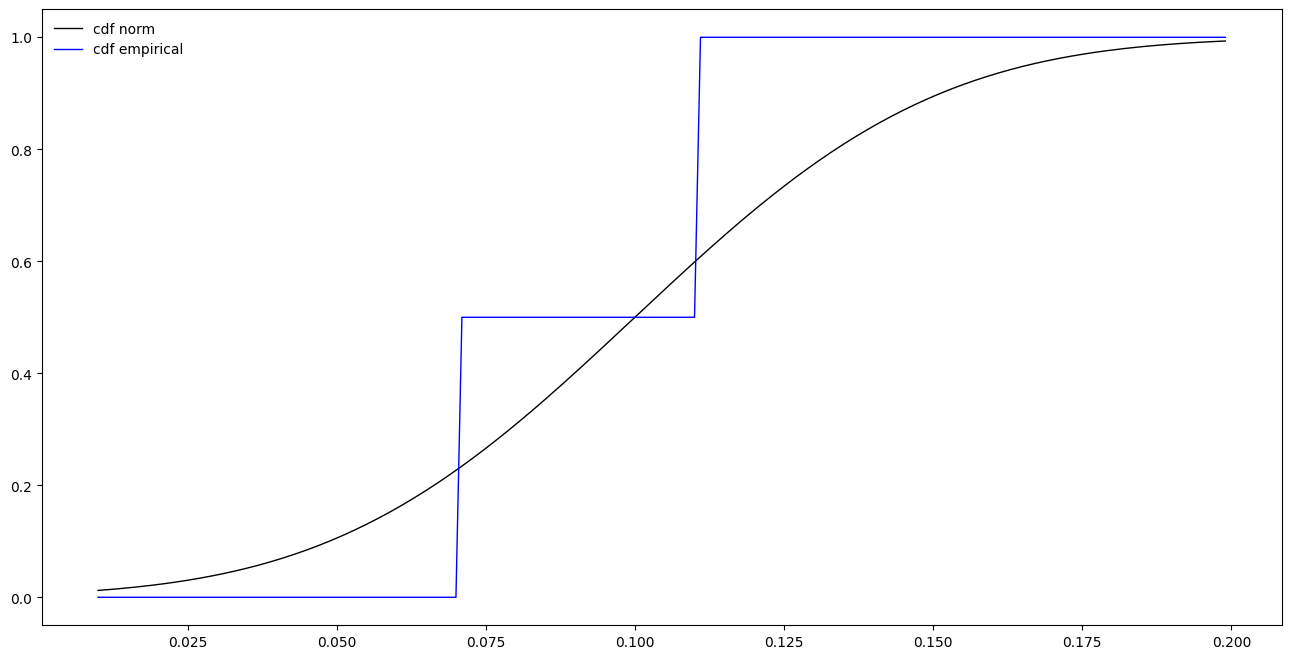

In [9]:

pyplot.figure(figsize=(16, 8))


pyplot.plot(x_axis, norm_cdf_y, 'k-', linewidth=1.0, label='cdf norm')
pyplot.plot(x_axis, emp_cdf_y, 'b-', linewidth=1.0, label='cdf empirical')

pyplot.legend(loc='best', frameon=False)
pyplot.show()

> Итак, статистика — это максимальное отклонение между синим и черным графиками. Замерив отклонение, можно убедиться, что статистика изменилась. Можно сделать вывод, что статистика действительно зависит от размера выборки.

> 🚨 Ниже приведены различные библиотечные варианты критерия Колмогорова. Запустим критерий на нашей выборке и проверим, насколько она соответствует нашему распределению с выбранными параметрами. 

#### Критерий Колмогорова есть в библиотеке stats

In [10]:
# в качестве cdf можно строкой указать распределение из scipy.stats
# в таком случае аргументы распределения подаются на вход отдельно через args
Dn, p = stats.kstest(rvs=sample, cdf='norm', args=(0.10, 0.04))
print(f'p-value: {p:.4f}')

p-value: 0.5285


In [11]:
# либо можно указать cdf в виде функции от x
Dn, p = stats.kstest(rvs=sample, cdf=lambda x: stats.norm.cdf(x, loc=0.10, scale=0.04))
print(f'p-value: {p:.4f}')

p-value: 0.5285


In [12]:
# для модников
from typing import Callable

def norm_cdf_closure(loc: float, scale: float) -> Callable:
    """for given normal distribution parameters returns CDF as a function of X only"""
    def inner_norm_cdf(x):
        return stats.norm.cdf(x=x, loc=loc, scale=scale)
    return inner_norm_cdf

# вместо 'norm' можно в явном виде указать любую функцию распределения
Dn, p = stats.kstest(sample, norm_cdf_closure(loc=0.10, scale=0.04))
print(f'p-value: {p:.4f}')

p-value: 0.5285


Можно заметить, что вне зависимости от варианта программы, результат совпадает 😊 

> ℹ️ Замечание!
Замерить мощность критерия Колмогорова очень сложно, и при этом она часто бывает не очень хорошей. Для проверки мощности приходится придумывать каждый раз, как это можно сделать. Чаще всего это делают с помощью Монте-Карло.

> ℹ️  Отметим еще раз, критерий Колмогорова позволяет осуществлять проверку для любого вида распределения, а не только для нормального.